# Assignment 7 Calculating Expectation Values

based on https://www.compadre.org/PICUP/exercises/exercise.cfm?I=115&A=shooting by Andy Rundquist

This Assignment should take you approximately 90 minutes to complete. It requires you to use your results from a successfully completed Assignment 6, so you'll need to complete that Assignment first.

After completing this Assignment, you will be able to...
* Calculate expectation values using numerical integration.
* Calculate uncertainty based on expectation values.
* Evaluate patterns in expectation values and uncertainty based on changes in energy level.

Dr. Lane welcomes your questions about this Assignment. Please send or bring a copy of your work-in-progress with your questions.

## Theory

We learned in Assignment 6 that the wave function $\psi$ tells you the probability density of where you can find the electron, but we didn't really do anything with this knowledge. In order to extract information from $\psi$, it's helpful to calculate **expectation values** of physically measurable quantities. An expectation value represents the average value you would *expect* to see after measuring that quantity many times.

Suppose, for example, we have an electron with a wave function $\psi$ (which we get from the Shooting Method in Assignment 6) and we want to measure its position $x$ many times. The expectation value of $x$, deonted $\langle x \rangle$, is calculated with an integral:

$$ \langle x \rangle = \int_{-\infty}^{+\infty} \psi x \psi dx $$.

Similarly, if you wanted the expectation value of $x^2$, you would integrate

$$ \langle x^2 \rangle = \int_{-\infty}^{+\infty} \psi x^2 \psi dx $$.

The quantity you want the expectation value of gets sandwiched between two copies of the wave function. (The wave function on the left is supposed to be the complex conjugate, but we're only working with real $\psi$s for now.)

## Numerical Integration

If you know an exact expression for $\psi$, you might be able to carry out the integrals above. However, most of the time we don't know $\psi$ but rather have a list of values for $\psi$, obtained from a computational method like the Shooting Method. However, these numerical values give us all the information we need to calcualte expectation values.

We can **numerically integrate** an expectation value using a simple Reimann sum. For example, the expectation value of position is

$$ \langle x \rangle = \sum_j \psi_j x_j \psi_j dx,$$

where $dx$ is our step size from the Shooting Method. We already have the $\psi_j$s and the $x_j$s stored in arrays after completing the Shooting Method, so we just need a **loop** to carry out the summation.

## Step 1: $\langle x \rangle$ for the Infinite Square Well
##### CODE DISCUSSION 
We'll start with the infinite square well, which has $V=0$ inside the well and $V=\infty$ outside the well. In the code cells below, copy and paste the energy value that produces one maximum in the wave function from Assignment 6.

In [1]:
from pylab import *

#UNITS: All lengths are in nm, all energies/masses are in eV.
hbar = 197 # hbar*c = 197 eV*nm
me = 511000 # me*c^2 = 511000 eV

def V(x):
    return 0

def psiDoublePrime(x,psi):
    return 2*me/hbar**2*(V(x)-E)*psi

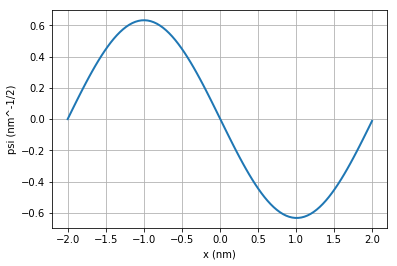

In [2]:
# Enter your guess for the energy here. Units are eV.
E = 0.095

# Enter minimum and maximum x and initial values for psi and psiPrime.
xmin = -2
xmax = 2
psi = 0
psiPrime = 1
nPoints = 100

dx = (xmax-xmin)/nPoints

xArray = linspace(xmin,xmax,nPoints)
psiArray = zeros(nPoints)

for j in range(len(xArray)):
    psiArray[j] = psi # Record previous value of psi.
    psiPrime += psiDoublePrime(xArray[j],psi)*dx # Step forward with psiPrime.
    psi += psiPrime*dx # Step forward with psi.

# Create plot
figure(1)
plot(xArray, psiArray, linewidth=2)
xlabel('x (nm)')
ylabel('psi (nm^-1/2)')
grid(True)
show()

Run the two code cells above. Then, run the code cell below to calculate $\langle x \rangle$.

In [3]:
# First, normalize the values of psi.
norm = 0
for i in range(len(psiArray)):
    norm += psiArray[i]**2*dx
for i in range(len(psiArray)):
    psiArray[i] /= sqrt(norm)

# Now calculate the expectation value.
expectationX = 0
for i in range(len(xArray)):
    expectationX = expectationX + psiArray[i]*xArray[i]*psiArray[i]*dx
print(expectationX)

0.005952771287059465


What does the ``[i]`` piece indicate in the code above? Why is is necessary that ``psiArray`` and ``xArray`` use the same value ``i``? How does this loop carry out a Reimann sum?

[Add your answer here.]

What value does the code produce for $\langle x \rangle$? Remember: There's lots of rounding error in numerical integration like this. Is the value near a special number, relevant to the problem? (If you don't see it, try moving the well to ``xmin=0`` and ``xmax=4``. Now what do you see?)

[Add your answers here.]

Repeat this process using the eigeneneriges that give a $\psi$ with 2 maxima, 3 maxima, ... all the way up to the highest energy you recorded in Assignment 6. (You'll need to re-run the Shooting Method each time, and then run the calculation of $\langle x \rangle$.) What do you notice about the values of $\langle x \rangle$?

[Add your answers here.]

Expectation values are probably a new concept to you, because we usually don't talk about them in classical mechanics. After all, if we know $x(t)$ exactly, why would we need to talk about averages? However, we can evaluate expectation values in classical mechanics, sometimes with just common-sense reasoning. Let's suppose you have a classical ball bouncing back and forth in a classical box. If you took many measurements of the ball's position, where in the box would the average position be? (No math necessary; just think of it visually.) How does this classical result compare with the quantum mechanical result?

[Add your answers here.]

## Step 2: $\langle x^2 \rangle$ for the Infinite Square Well
##### CODE DISCUSSION 
In the code cell below, copy and paste the calculation of $\langle x \rangle$. Then, modify it to calculate $\langle x^2 \rangle$, instead. (You might change the name of ``expectationX`` to ``expectationX2`` to avoid confusion.

Run your new code for the same eigenergies that you used in Step 1. What pattern do you notice in $\langle x^2 \rangle$ as the energy level increases?

[Add your answers here.]

## Step 3: Uncertainty
##### CODE DISCUSSION 
One of the most important quantities in quantum mecahnics is the **uncertainty** (or standard deviation) in a measurable quantity. Uncertainy is defined as the expectation value of the square minus the square of the expectation value, all under a square root. **That's a mouthful**; it's more easily written with math:

$$
\Delta x = \sqrt{ \langle x^2 \rangle - \langle x \rangle^2 }.
$$

Calculate $\Delta x$ for each eigenergy in the infinite square well that you used above. What pattern do you notice in $\Delta x$ as the energy increases? (You might like to have Python do the math for you.)

[Add your answer here.]

In [4]:
# Here's a code cell, in case that's helpful!

## Step 4: Expectation Values of Momentum
##### CODE DISCUSSION MATH
The other measurable quantity we're interested in is the momentum and its square. In quantum mecahnics, momentum is not a number, but an **operator**:
$$
\begin{eqnarray}p & = & \frac{\hbar}{i}\frac{d}{dx} \\
p^2 &=& -\hbar^2 \frac{d^2}{dx^2}.
\end{eqnarray}
$$

This is where the sandwiching order in the expectation value is crucial:

$$ \langle p \rangle = \int_{-\infty}^{+\infty} \psi \left( \frac{\hbar}{i}\frac{d}{dx} \right) \psi dx$$

means we have to take a derivative of the $\psi$ on the right, then multiply by the $\psi$ on the left. Similarly,

$$ \langle p^2 \rangle = \int_{-\infty}^{+\infty} \psi \left( -\hbar^2 \frac{d^2}{dx^2} \right) \psi dx$$

means we have to take two derivatives of the $\psi$ on the right, then multiply by the $\psi$ on the left. 

The $i = \sqrt{-1}$ in the momentum operator is bothersome. Since a measurement of momentum must produce a real number, it means the expectation value of momentum for our real-valued $\psi$ had better always come out to be zero. If you ever have an $i$ leftover in an expectation value, there's a mistake somewhere you need to fix.

We know that the eigenfunctions for the infinite square well are 
$$
\psi_n(x) = \sqrt{ \frac{2}{L} \sin\left(\frac{n\pi x}{L}\right) }
$$
Show that this eigenfunction satisfies $\langle p \rangle = 0$ as required.

[Write your answer here. Format your math with $\LaTeX$.]

Our Shooting Method code is already calculating the values of $\psi'$ and $\psi''$ for us; we just need to tell it to store this information. In the code cells below, copy and paste your code for the Shooting Method with the infinite square well. Add an array ``psiPrimeArray`` that will store the values of $\psi'$ and an array ``\psiDoublePrimeArray`` that will store the values of $\psi''$, just as ``\psiArray`` stores the values of $\psi$.

Now, in the code cell below, set up a calculation of $\langle p \rangle$ and $\langle p^2 \rangle$. Calculate these expectation values and $\Delta p$ for each of the eigenenergies that you used earlier. What pattern do you notice as the energy level increases?

[Add your answers here.]

## Step 5: The Uncertainty Principle
##### CODE DISCUSSION 
The Heisenberg Uncertainty Principle (HUP) says that it's impossible to know with exact precision both the position and momentum of an electron at the same time. Mathematically, this is expressed as 

$$\Delta p \Delta x > 0$$.

(Actually, it's greater than or equal to a minimum value of $\hbar/2$, but that requires us to normalize $\psi$ and I've overloaded your brain enough already.) Confirm that the HUP applies to $\Delta p$ and $\Delta x$ for each eigenenergy you've investigated above.

[Add your answers here.]

# EXTRA CREDIT
## Step 6: Repeat for the Harmonic Oscillator
Repeat this entire notebook for the Harmonic Oscillator. This extra credit step is worth one entire Assignment.